<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Scatter%20plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/Layer-Readings_2.csv",header=None)

In [2]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [3]:
df.drop(['3','5', '7', '9', '11', '13','14'],axis='columns', inplace=True)

In [4]:
test = df.to_dict(orient="records")

In [ ]:
test

In [7]:
frame_define = []
for i in test:
  key_arr = i.keys()
  for key in key_arr:
    if key not in ['0','1']:
      dc1 = {}
      dc1['X'] = i.get('0')
      dc1['Y'] = i.get('1')
      dc1['Column'] = key
      dc1['Value'] = i.get(key)
      frame_define.append(dc1)

In [9]:
df2 = pd.DataFrame(frame_define)

In [11]:
df3 = df2.loc[~((df2['Value'] == 0))]

In [18]:
df3

,X,Y,Column,Value,Estimated_layer
0,0,0,2,329.996735,2
6,0,0,2,330.775604,2
12,0,0,2,329.943512,2
13,0,0,4,363.551544,2
18,0,0,2,329.553131,2
...,...,...,...,...,...
3043567,1174172,1736705,4,2868.770264,8
3043568,1174172,1736705,6,1771.906250,1
3043569,1174172,1736705,8,1969.887939,1
3043570,1174172,1736705,10,1947.039795,1


In [17]:
df3.dropna(subset = ["Value"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df3.to_csv("xydf.csv")

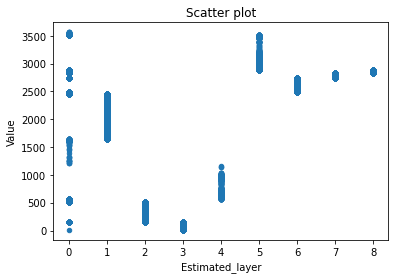

In [20]:
#original dataset df4 without any reduction
import matplotlib.pyplot as plot

df3.plot.scatter(x="Estimated_layer", y="Value", title= "Scatter plot");
plot.show(block=True);

In [13]:
def  estimated_flayer_check(Value):
    if 1640.422485	<= Value < 2454.603760:   #range values defined using previously found 8 clusters 
        return 1
    elif 162.037338	<= Value < 507.744263:
        return 2
    elif 9.638062 <= Value < 158.638474:
        return 3
    elif 571.511841 <= Value < 1173.570801:
        return 4
    elif 2889.859619 <= Value < 3512.961670:
        return 5
    elif 2495.293701 <= Value < 2737.822754:
        return 6
    elif 2739.154053 <= Value < 2824.901123:
        return 7
    elif 2829.354736	<= Value < 2889.367920:
        return 8
    else:
        return 0                                  #values which does not come under specified range

In [14]:
#checked on the original dataset without any reduction
df3['Estimated_layer'] = df3['Value'].apply(estimated_flayer_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
print(df3['Estimated_layer'].value_counts())

2    423367
7    243057
8    176025
1    109644
5     65883
6     27946
3     18345
0      2810
4      1820
Name: Estimated_layer, dtype: int64


In [21]:
def in_range(val,threshold=1500,ranges=50):
    try:
        
        for i in range (0,len(val)):
            val1=float(val[i])
            if val1<threshold+ranges and val1>threshold-ranges:
                return val1
        
        return -1  
    except:
        print(val1)
        print(val2)
        print(val3)
        return -1

In [24]:
df3['num']=df3. index
dft= df3[df3['Estimated_layer']>0]
dft['num']=dft. index
dft=dft[dft['num']%10==0]


x=dft['X']
y=dft['Y']
z=dft['Estimated_layer']


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from os import path

# # Special imports
# from scipy.cluster.hierarchy import dendrogram, linkage
# import scipy.cluster.hierarchy as shc
# from sklearn.cluster import AgglomerativeClustering

# # %matplotlib inline

# print("============================================================")
# print("       Hierarchical Clustering demo - num of clusters       ")
# print("============================================================")
# print(" ")


# # Retain only the last two columns
# data = df.iloc[:, 3:5].values


# # Initialize hiererchial clustering method, in order for the algorithm to determine the number of clusters
# # put n_clusters=None, compute_full_tree = True,
# # best distance threshold value for this dataset is distance_threshold = 200
# cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=200)

# # Cluster the data
# cluster.fit_predict(data)

# print(f"Number of clusters = {1+np.amax(cluster.labels_)}")